#IMPORT THE REQUIRED MODULES

In [2]:
import pandas as pd
import numpy as np

In [ ]:
import re
import nltk
from nltk.corpus import stopwords 

In [ ]:

import seaborn as sns

#ML PACKAGES AND ESTIMATORS
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#DATA EXPOSURE

In [ ]:
df = pd.read_csv("C:/Users/KAUSHIK/emotion-detection-using-nlp/data/emotion_dataset_raw.csv")

In [ ]:
df

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...
34788,joy,The world didnt give it to me..so the world MO...
34789,anger,A man robbed me today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO..."


In [ ]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

#DATA VISUALIZATION

<AxesSubplot:xlabel='Emotion', ylabel='count'>

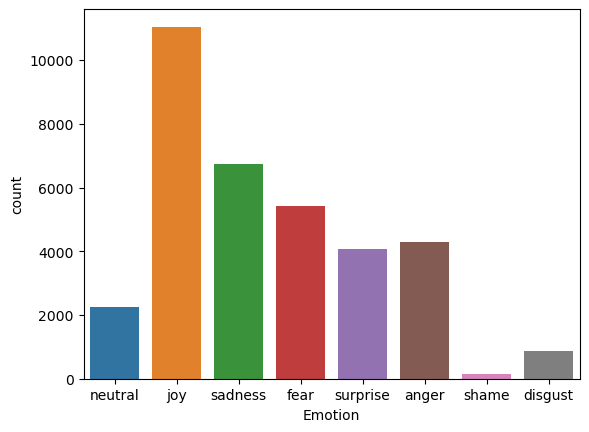

In [ ]:
sns.countplot(x='Emotion',data=df)

#DATA PREPROCESSING

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:

corpus = []
for i in range(0,len(df)):
    review = re.sub('[^a-zA-Z]', ' ', str(df['Text'][i]))
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
                

In [ ]:
corpus

['',
 'sage act upgrad list tommorow',
 'way homegirl babi funer man hate funer realli show bless',
 'eye true hazel eye brilliant regular featur open counten complexion oh bloom full health pretti height size firm upright figur health mere bloom air head glanc one hear sometim child pictur health alway give idea complet pictur grown health loveli',
 'iluvmiasanto ugh babe hugggzzz u babe naamaz nga ako e babe e despit nega ma pinaramdam fil ko ang',
 'expect extrem import phonecal minut terror opportun',
 'couldnt wait see live miss nh wasnt pain enuf suraj perform last gig delhi',
 'maken tip stop op een moment dat je het hele project wel ziet zitten nu du derestkomtlaterwel',
 'en dan krijg je ff een cadeautj van een tweep melik',
 'drummer boy bij op verzoek van biemoosterhof frankcornet welk uitvoer van wie',
 'bull toss effigi hand becam infuri',
 'peopl hide behind fake smile',
 'life leopold must truli happi hope prayer belov son seem last come fruition',
 'assault laughter not

In [ ]:
df['clean text'] = corpus

In [ ]:
df

,Emotion,Text,clean text
0,neutral,Why ?,
1,joy,Sage Act upgrade on my to do list for tommorow.,sage act upgrad list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,way homegirl babi funer man hate funer realli ...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eye brilliant regular featur op...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,iluvmiasanto ugh babe hugggzzz u babe naamaz n...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,michelgw gift hope like hand made wear keep wa...
34788,joy,The world didnt give it to me..so the world MO...,world didnt give world definit cnt take away
34789,anger,A man robbed me today .,man rob today
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",youu call jealousi call lose


#FEATURE SELECTION

In [ ]:
Xfeatures = df['clean text']
ylabels = df['Emotion']

#DATA SPLIT AND MODEL TRAINING

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

#MODEL FITTING

In [ ]:
pipe_lr.fit(x_train,y_train)

c:\Users\KAUSHIK\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

#MODEL EVALUATION

In [ ]:
pipe_lr.score(x_test,y_test)

0.6330714696301973

In [ ]:
ex = "i am very much happy!!!"

In [ ]:
pipe_lr.predict([ex])

array(['neutral'], dtype=object)

#SAVING THE MODEL

In [ ]:
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_03_june_2021_1.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()